# Projeto Titanic - prática exploratória de analise utilizando Python e ensinamentos de Fundamentos Data Science I - Udacity. 

# Como objeto de estudos, a análise será focada nos seguintes questionamentos:
1. Qual o % dos passageiros sobreviventes?
2. Qual o % de sobreviventes por local de embarque?
3. Qual a distribuição de sobreviventes por gênero por local de embarque?
4. Local de embarque influenciou na probabilidade de sobrevivência?


# Definindo os tipos de libraries a serem utilizadas

In [47]:
import pandas as pd
import matplotlib as plt
% matplotlib inline

# 1- Carregando o arquivo original

In [49]:
df_tit = pd.read_csv('titanic_data_6.csv')

# Referencia de dados - by Kaggel

VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

Referencias de sites:
* https://www.kaggle.com/andyyang/titanic-survival-project
* http://queirozf.com/entries/pandas-dataframe-groupby-examples
* https://github.com/sadbut-1/data-science-titanic/blob/master/Projeto%202%20-%20Conclusao.ipynb
* https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
* https://www.kaggle.com/aliendev/example-of-pandas-dropna
* https://github.com/Marcelo-Peres/Udacity-Projects/blob/master/Data%20Science%20I%20-%20Fundamentals/Project%2002/P2.ipynb


# 2 - Entendo os dados

In [50]:
#Identificação do tamanho do dataframe Titanic
df_tit.shape

(891, 12)

In [51]:
#Análise do tipos de dados conforme a coluna e contagem de dados preenchidos (não nulos)
df_tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


A função .info() nos traz a contagem de dados por colunas e o tipo de dados de cada coluna, o que demonstra que "Age", "Cabin" e " Embarked" possuem dados incompletos. 

In [53]:
#Função para visualização das 4 primeiras linhas e cabeçalho para validação de informações.
df_tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Para facilitar as análises, vamos descartar alguns dados que não serão utilizados:
'Name' , 'SibSp' , 'Parch' , 'Ticket', 'Fare','Cabin'

In [54]:
# descarte colunas do conjunto de dados em novo df
df_tits = df_tit.drop(['Name', 'SibSp', 'Parch', 'Ticket' , 'Fare','Cabin'], axis=1)


In [55]:
#Check de elimanação de dados no df de recorte
df_tits.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,male,22.0,S
1,2,1,1,female,38.0,C
2,3,1,3,female,26.0,S
3,4,1,1,female,35.0,S
4,5,0,3,male,35.0,S


Para facilitar a análise, a troca do cabeçalho

In [56]:
# manter todos os nomes em minusculo e com referencias em Portugues
df_tits.rename(columns=lambda x: x.strip().lower(), inplace=True)
df_tits.rename(columns={"passengerid": "id_passageiro", "survived":"sobrevida", 
                        "pclass":"classe", "sex":"genero", "age":"idade", "embarked":"local"}, inplace=True)

In [57]:
#Visualização do dataframe utilizado
df_tits.head(1)

,id_passageiro,sobrevida,classe,genero,idade,local
0,1,0,3,male,22.0,S


In [58]:
df_tits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
id_passageiro    891 non-null int64
sobrevida        891 non-null int64
classe           891 non-null int64
genero           891 non-null object
idade            714 non-null float64
local            889 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 41.8+ KB


# 3 -Tratando dados

In [59]:
#identificando colunas com valores nulos
df_tits.isnull().sum()

id_passageiro      0
sobrevida          0
classe             0
genero             0
idade            177
local              2
dtype: int64

In [60]:
#Para fins de análise, vamos ignorar as linhas que possuem dados em branco na coluna "local".
df_tits.dropna(axis=0, subset=['local'], inplace = True) 

In [61]:
#check para confirmar operação de descarte de linhas com coluna "local" nulo.
df_tits.isnull().sum()

id_passageiro      0
sobrevida          0
classe             0
genero             0
idade            177
local              0
dtype: int64

In [62]:
#Para fins de análise, vamos assumir a média de 'idade' nas linhas que possuem dados nulos.
df_tits['idade'].fillna((df_tits['idade'].mean()), inplace=True)

In [63]:
#check para confirmar operação de descarte de linhas com coluna "local" nulo.
df_tits.isnull().sum()

id_passageiro    0
sobrevida        0
classe           0
genero           0
idade            0
local            0
dtype: int64

In [64]:
#Renome das referencias dos locais de embarque pelos nomes completos de cada porto utilizado
df_tits['local'] = df_tits['local'].str.replace("S", "Southampton").replace("C","Cherbourg").replace("Q","Queenstown")

In [65]:
#Visualização do dataframe utilizado
df_tits.head(2)

,id_passageiro,sobrevida,classe,genero,idade,local
0,1,0,3,male,22.0,Southampton
1,2,1,1,female,38.0,Cherbourg


# Visualizando dados básicos

Visualizar os dados iniciais favorece a compreensão das hipoteses

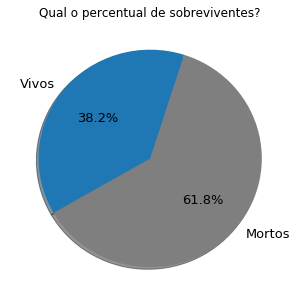

In [102]:
#Grafico 1 - % de sobreviventes
df_tits['sobrevida'].value_counts().plot.pie(colors=('tab:gray', 'tab:blue'), 
                                       title='Qual o percentual de sobreviventes?', 
                                       fontsize=13, shadow=True, startangle=210,autopct='%0.1f%%',
                                       labels=('Mortos','Vivos'),
                                       figsize=(5,5)).set_ylabel('');

In [67]:
print('Vivos  :', df_tits['sobrevida'].value_counts()[1])
print('Mortos :', df_tits['sobrevida'].value_counts()[0])

Vivos  : 340
Mortos : 549


Grafco 1 - Apenas 38,2% dos passageiros considerados na amostra sobreviveram, sendo 340, dos 891 passegeiros referenciados no dataframe original.

Por Genero

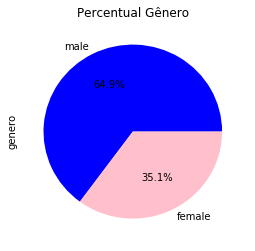

In [103]:
#Grafico 2 - % de genero dos passageiros
df_tits['genero'].value_counts().plot(kind='pie',
                                      figsize=(4, 4),
                                      title='Percentual Gênero',
                                      colors=('blue','pink'),
                                      autopct=('%1.1f%%'));

In [69]:
print(df_tits.groupby('genero')['sobrevida'].sum())

genero
female    231
male      109
Name: sobrevida, dtype: int64


Gráfico 2 - A contagem de dados nos demonstra que 233 passageiros são female (mulheres), representando 35,1%, sendo praticamente um terço de todos os embarcados listados.

# Definindo Funções de Plotagem

In [141]:
#Definindo uma função para plotagem de gráfico em barras , com a variação entre count e sum.
def plotbar(col1, col2, title1 , f1 ):
    if f1 == 1:
        df_tits.groupby(col1)[col2].sum().plot(kind='bar', title= title1)
    else:
        df_tits.groupby(col1)[col2].count().plot(kind='bar', title= title1)

In [144]:
#Definindo uma função para plotagem de gráfico em pizza , com a variação entre count e sum.
def plotpie(col1, col2, title1 , f1 ):
    if f1 == 1:
        df_tits.groupby(col1)[col2].sum().plot(kind='pie', figsize=(4, 4), title= title1, autopct=('%0.2f%%'))
    else:
        df_tits.groupby(col1)[col2].count().plot(kind='pie', figsize=(4, 4), title= title1, autopct=('%0.2f%%'))        

In [145]:
#Definindo uma função para plotagem de gráfico em barras , com a variação entre count e sum, considerando 3 colunas.
def plotbar3(col1, col2, col3, title1 , f1 ):
    if f1 == 1:
        df_tits.groupby([col1, col2])[col3].sum().unstack().plot(kind='bar',title= title1,stacked=True)
    else:
        df_tits.groupby([col1, col2])[col3].count().unstack().plot(kind='bar',title= title1,stacked=True)

Plotagem de gráfico a partir das funções

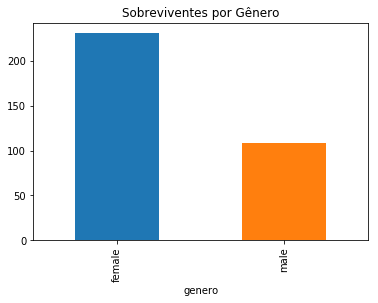

In [147]:
#Utilizando a função de gráfico de barras, com opção sum.
# Como os dados de sobrevida estão mapeados em 0 ou 1, a soma representará a contagem dos sobreviventes apenas.

#Gráfico 3 - Contagem de sobreviventes por genero
plotbar ('genero','sobrevida','Sobreviventes por Gênero',1)

Gráfico 1, 2 e 3 - A contagem de sobreviventes por genero, mostra que apesar da maioria de passageiros (64,8%) serem homens, dentre os sobreviventes 68% foram mulheres.

Por Classe

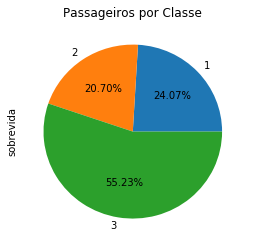

In [148]:
#Utilizando a função de gráfico de pizza, com opção count.
# Como os dados de sobrevida estão mapeados em 0 ou 1, o count representará a contagem de todos os passageiros da amostra.

#Grafico 4 - % de passageiros por classe
plotpie('classe','sobrevida','Passageiros por Classe',0)

Gráfico 4 - A análise por classe nos revela que mais de 75% dos embarcados eram de 2ª e 3ªclasse, sendo a última responsável por mais de 50% dos presentes.

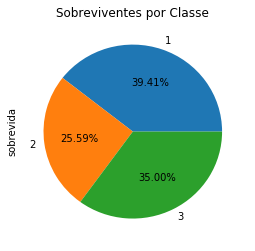

In [149]:
#Utilizando a função de gráfico de pizza, com opção sum.
# Como os dados de sobrevida estão mapeados em 0 ou 1, a soma representará a contagem dos sobreviventes apenas.

#Grafico 5 - % de sobreviventes por classe
plotpie('classe','sobrevida','Sobreviventes por Classe',1)

Gráfico 5 - Apesar de mais de 75% dos embarcados serem de classes mais baixas, foram os embarcados de 1ª classe com maior representatividade entre os sobreviventes.

Por Local de embarque

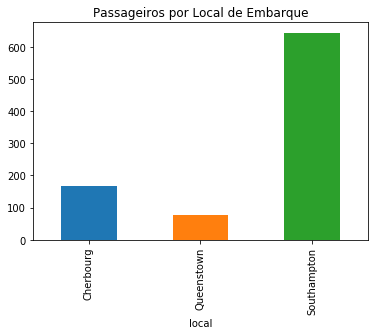

In [150]:
#Utilizando a função de gráfico de barras, com opção count.
# Como os dados de sobrevida estão mapeados em 0 ou 1, o count representará a contagem de todos os passageiros da amostra.

#Gráfico 6 - Contagem de passageiros por local de embarque
plotbar ('local','sobrevida','Passageiros por Local de Embarque',0)

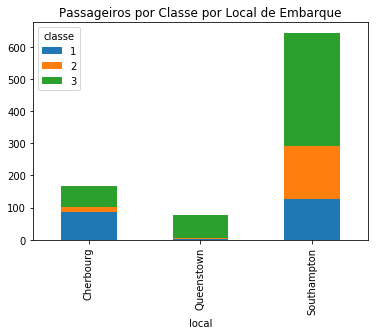

In [151]:
#Utilizando a função de gráfico de barras com 3 colunas, com opção count.
# Como os dados de sobrevida estão mapeados em 0 ou 1, o count representará a contagem de todos os passageiros da amostra.

#Grafico 7 - Contagem de passageiros por local de embarque e classe
plotbar3('local','classe','sobrevida','Passageiros por Classe por Local de Embarque',0)

Gráfico 6 e 7 - As contagens agrupados por local de embarque (gráfico 6) e por local e classe (gráfico 7) nos 
mostra que Southampton foi o porto mais movimentado. E em Queenstown e Southamptom a predominancia de embarcados foi de 3ª classe.
Já Cherbourg a predominância foi de 1ªclasse.

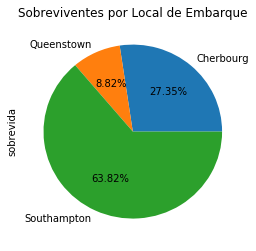

In [152]:
#Utilizando a função de gráfico de pizza, com opção sum.
# Como os dados de sobrevida estão mapeados em 0 ou 1, a soma representará a contagem dos sobreviventes apenas.

#Grafico 8 - % de sobreviventes por local de embarque
plotpie('local','sobrevida','Sobreviventes por Local de Embarque',1)

Gráfico 8 - Relembrando que a maior parte dos sobreviventes foram de 1ªclasse (gráfico 5), é dedutível o porque os embarcados de Queenstown tem o menor (8,8%) % de sobreviventes, visto que sua maior de embarcados eram de 3ªclasse (gráfico 7).

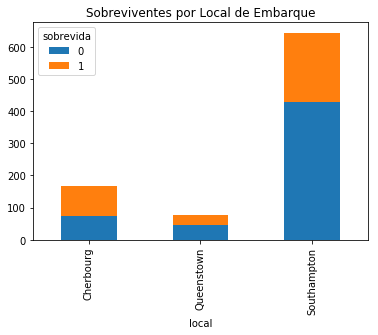

In [153]:
#Utilizando a função de gráfico de barras com 3 colunas, com opção count.
# Como os dados de sobrevida estão mapeados em 0 ou 1, o count representará a contagem de todos os passageiros da amostra.

#Grafico 9 - Contagem de passageiros por local de embarque e sobrevivência
plotbar3('local','sobrevida','id_passageiro','Sobreviventes por Local de Embarque',0)

In [154]:
print(df_tits.groupby('local')['sobrevida'].sum())

local
Cherbourg       93
Queenstown      30
Southampton    217
Name: sobrevida, dtype: int64


Gráfico 9 - Devido a maior concentração de pessoas serem originais de Southampton(gráfico 6), proporcionalmente os embarcados de lá também apresentam maior % de sobreviventes.

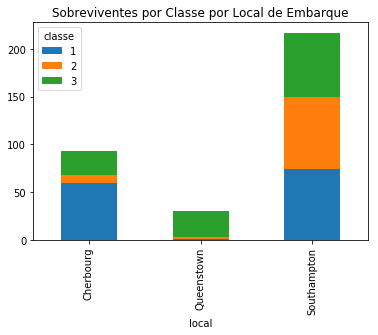

In [155]:
#Utilizando a função de gráfico de barras com 3 colunas, com opção sum.
# Como os dados de sobrevida estão mapeados em 0 ou 1, a soma representará a contagem dos sobreviventes apenas.

#Grafico 10 - Contagem de sobreviventes por local de embarque e classe
plotbar3('local','classe','sobrevida','Sobreviventes por Classe por Local de Embarque',1)

Gráfico 10 - Reforçando a análise do gráfico 5 e 6 , apesar da maior dos embarcados serem de 3ªclasse (gráfico 7), a maioria de sobreviventes são de 1ªClasse em Cherbourg e Southampton. O cenário é diferente para os que embarcaram em Queenstown, como também visto no gráfico 7, nesse porto praticamente não tivemos embarcados de 1ª classe.

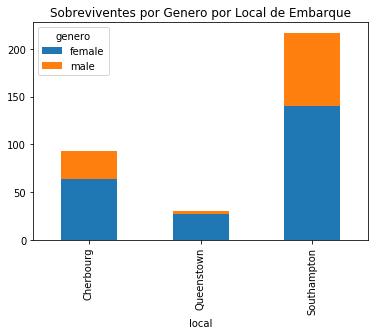

In [156]:
#Utilizando a função de gráfico de barras com 3 colunas, com opção sum.
# Como os dados de sobrevida estão mapeados em 0 ou 1, a soma representará a contagem dos sobreviventes apenas.

#Grafico 11 - Contagem de sobreviventes por local de embarque e genero
plotbar3('local','genero','sobrevida','Sobreviventes por Genero por Local de Embarque',1)

Com a leitura e comparações dos gráficos, podemos considerar que 1ª Classe foi a que mais sobreviveu independente do ponto de embarque. E as mulheres apresentam maior % de sobrevivência em todas as classes e locais de embarque.

Entretanto a análise demonstra que os dados são insuficientes para conclusões concretas, visto que são inferências simples sobre dados de gênero, classe e local. Desta forma os trabalhos não geram dados suficientes para proposição sobre interferência da origem na probabilidade de sobrevivência. 

# Conclusões

A análise dos dados cedido pela Kaggel, além de práticas de reorganização e visualização de dados usando Python,
nos traz alguns viés sobre os passageiros do terrível acidente com o Titanic.

Nessa análise podemos notar os seguintes pontos:
    * Maior parte dos passageiros foram homens e de 3ª Classe
    * O porto com maior nº de passeiros foi Southampton, e o porto com maior concentração de passageiros de 1ªClasse foi o de Cherbourg.
    * As mulheres de 1ª Classe foram as que tiveram maior índice de sobrevivência.

Respostas das questões propostas:
1. Qual o % dos passageiros sobreviventes?
    O percentual dos dados considerados foi de 38,2%
    
2. Qual o % de sobreviventes por local de embarque?
    A distribuição de sobreviventes entre os locais de embarque foi de:
        Southamptom 63,8%
        Queenstown 8,8%
        Cherbourg 27,4%

3. Qual a distribuição de sobreviventes por gênero por local de embarque?
    Através da análise da plotagem, é visível a maior presença das mulheres em todos os locais de embarque.

4. Local de embarque influenciou na probabilidade de sobrevivência?
    Não é conclusivo a inferência sobre o local de embarque na probabilidade de sobrevivência, sendo necessário um cruzamento 
mais detalhados de outros dados como 'classe', 'idade', posição das cabines, entre outros.
    
    
Limitações

Por se tratar de uma prática de estudos em data science I, as aplicações de funções e plotagens foi limitada aos
exemplos práticados em sala de aula.

A ausência de alguns dados, como 'Local de Embarque' e a opção de descarte desses dados, ou preenchimento por média no caso 
de dados de 'Idade', a acuracidade dos dados foi afetada.
